In [8]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
# Configurações gerais
input_shape = (224, 224, 3)
batch_size = 32
num_classes = 2
epochs = 10

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
dataset_dir = "/content/drive/My Drive/projeto_final/dataset"

In [7]:
# Configuração de Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2
)

In [18]:
# Geradores de dados
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [19]:
# Carregar modelo pré-treinado
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=input_shape)
base_model.trainable = False

In [20]:
# Construção do modelo
inputs = tf.keras.Input(shape=input_shape)
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model = Model(inputs, outputs)

# Compilação do modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [22]:
# Treinamento do modelo
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.4775 - loss: 0.8933 - val_accuracy: 0.5000 - val_loss: 0.7402
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.5484 - loss: 0.7645 - val_accuracy: 0.5000 - val_loss: 0.7086
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.5457 - loss: 0.7875 - val_accuracy: 0.5000 - val_loss: 0.7102
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 357ms/step - accuracy: 0.4634 - loss: 0.7648 - val_accuracy: 0.5000 - val_loss: 0.6998
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 364ms/step - accuracy: 0.5360 - loss: 0.7322 - val_accuracy: 0.5250 - val_loss: 0.6850
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.4673 - loss: 0.7547 - val_accuracy: 0.5250 - val_loss: 0.6848
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - accuracy: 0.5390 - loss: 0.7251 - val_accuracy: 0.6750 - val_loss: 0.6747
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 359ms/step - accuracy: 0.5562 - loss: 0.7411 - val_accuracy: 0.5000 - val_loss: 0.6894
Epoch

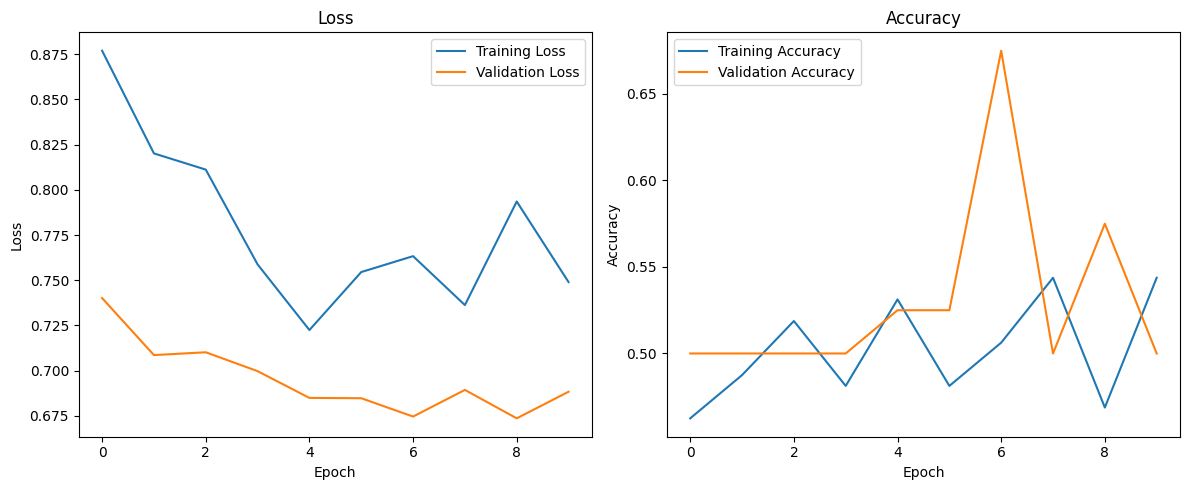

In [23]:
# Plot das curvas de desempenho
plt.figure(figsize=(12, 5))
# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()